### 3D-plotting of 2D DICOM slices of patient #2:

In [1]:
# import libraries: 
import pydicom
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imsave
from PIL import Image
import imageio

import sys
import glob
import os
import re

In [2]:
# get list of paths of original patient scans: 
def paths_to_list(path):
    """ appends complete file paths to list"""
    files = []
    for fn in os.listdir(path):
        filepath = os.path.join(path + fn)
        files.append(filepath)
    return files

In [3]:
path = '/Users/krystanafoh/datasets/3Dircadb1/3Dircadb1.2/PATIENT_DICOM/'
files = paths_to_list(path)

In [4]:
# sort filepaths in correct order: 
def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    ''' sorts in human order '''
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]

files.sort(key=natural_keys)

In [5]:
# read in DICOM files: 
def read_dicom(paths):
    slices = []
    for file in files: 
        slices.append(pydicom.dcmread(file))
    return slices

In [6]:
slices = read_dicom(files)

In [7]:
# pixel aspects, assuming all slices are the same
ps = slices[0].PixelSpacing
ss = slices[0].SliceThickness
ax_aspect = ps[1]/ps[0]
sag_aspect = ps[1]/ss
cor_aspect = ss/ps[0]

In [8]:
# create 3D array
img_shape = list(slices[0].pixel_array.shape)
img_shape.append(len(slices))
img3d = np.zeros(img_shape)

In [9]:
# fill 3D array with the images from the files
asarrays = []
for i, s in enumerate(slices):
    img2d = s.pixel_array
    img3d[:, :, i] = img2d
    asarrays.append(img2d)

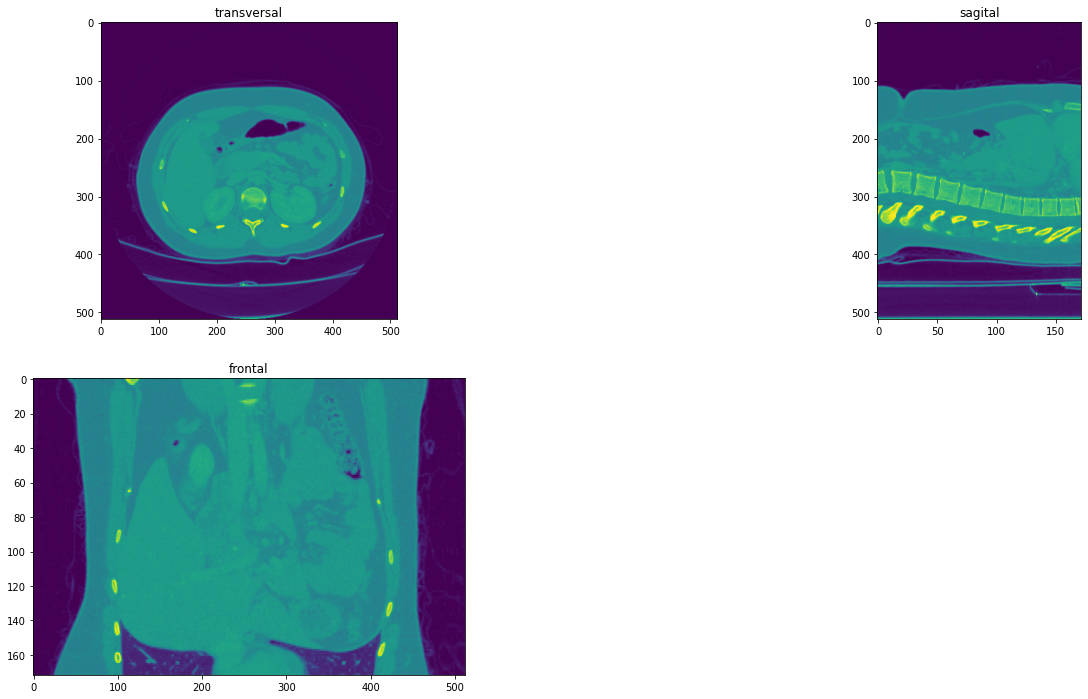

In [10]:
# plot 3 orthogonal slices
plt.rcParams['figure.figsize']=(24,12)

a1 = plt.subplot(2, 2, 1)
plt.title('transversal')
plt.imshow(img3d[:, :, img_shape[2]//2])
a1.set_aspect(ax_aspect)

a2 = plt.subplot(2, 2, 2)
plt.title('sagital')
plt.imshow(img3d[:, img_shape[1]//2, :])
a2.set_aspect(sag_aspect)

a3 = plt.subplot(2, 2, 3)
plt.title('frontal')
plt.imshow(img3d[img_shape[0]//2, :, :].T)
a3.set_aspect(cor_aspect)

plt.show()

In [11]:
# save images as png's:
i = 1
for array in asarrays: 
    image = Image.fromarray(array)
    name = f'{i}_img.png'
    imsave(name , image)
    i += 1

In [ ]:
# save as animated gif: 
images = []
for i in range(1, 129):
    filename = f'./patient2/{i}_img.png' #.format(i)
    images.append(imageio.imread(filename))

imageio.mimsave('animated_patient2_original.gif', images, fps=20)   